___
María del Carmen Martínez Hernández\
Sindy Citlali Sánchez Ponce\
Carolina Anidsel Casillas García\

Link Github: https://github.com/CarolinaCasillas/PM2_MartinezM1_SanchezS2_CasillasC3
___
## 1.1 Generación de Terrenos Aleatorios.

### 1.2 Introducción
> Un fractal es un objeto geométrico caracterizado por presentar una estructura que se repite a diferentes escalas. En cierto modo, se trata de un patrón sin fin. (Fernández Cara, 2018)

> Los geometría fractal es útil para modelar formas complejas de la naturaleza. Una de sus muchas aplicaciones es para generar terrenos. Un terreno fractal, es una superficie generada usando un algoritmo diseñado para producir un comportamiento fractal que mimetiza la apariencia de un terreno natural. En otras palabras, el resultado de este procedimiento es una superficie aleatoria que exhibe comportamiento fractal. (Fractal landscape, 2022)

### 1.3 Objetivos.
> #### 1.1 Objetivo general.
>  - Generar terrenos con fractales utilizando el algoritmo de diamante cuadrado.
> #### 1.2 Objetivos específicos
>  - Comprender y utilizar el algoritmo del diamente-cuadrado.
>  - Graficar datos en 3D.
>  - Utilizar números aleatorios.

### 1.4 Modelo que representa el problema.
> Para la generación de terrenos utilizamos el algoritmo del diamante-cuadrado. El algoritmo del diamante-cuadrado comienza con una matriz cuadrada, bidimensional de ancho y alto $2^n + 1$. Las cuatro esquinas de la matriz inician con el mismo valor de altura.

> Tomando lo anterior como punto de partida, comienza una rutina iterativa que consta de dos pasos:
> 1. Paso Diamante
> Para cada cuadrado de la matriz, se genera un valor aleatorio en el punto medio del cuadrado, donde se intersecan las dos diagonales. El valor del punto medio se calcula promediando los cuatro valores de las esquinas, más una cantidad aleatoria. 
> 2. Paso Cuadrado
> Para cada diamante de la matriz, se establece un valor aleatorio en el centro del diamante. Se calcula el valor del punto medio promediando los valores de las esquinas, más una cantidad aleatoria generada en el mismo rango que se usó para el paso diamante. Esto te da cuadrados de nuevo.\
(Martz)
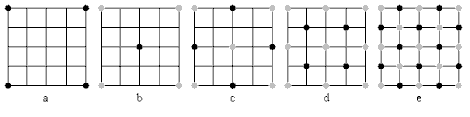

> La cantidad aleatoria que se le suma (o resta en dado caso) está dada por la ecuacion de altura h. Este valor cambia en cada iteración para que entre más pequeño sea el diamante o cuadrado, más pequeño sea el aumento y evitar de esta forma picos grandes. Esta depende de h la cual determinara que tan liso o rugoso se quiere el terreno.

$$rango*h*2^{-h}$$


### 1.5 Solución del problema y 1.6 Visualización de la solución del problema.

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm

In [30]:
#colocamos matriz inicial
matriz = np.zeros((3,3))
#ponemos variables iniciales que definen el tamaño y smoth de nuestra superficie
rango=1
h=0.1
maxstep = 6
opciones = [0.2,0.4,0.8]
prob = [2,1,5]

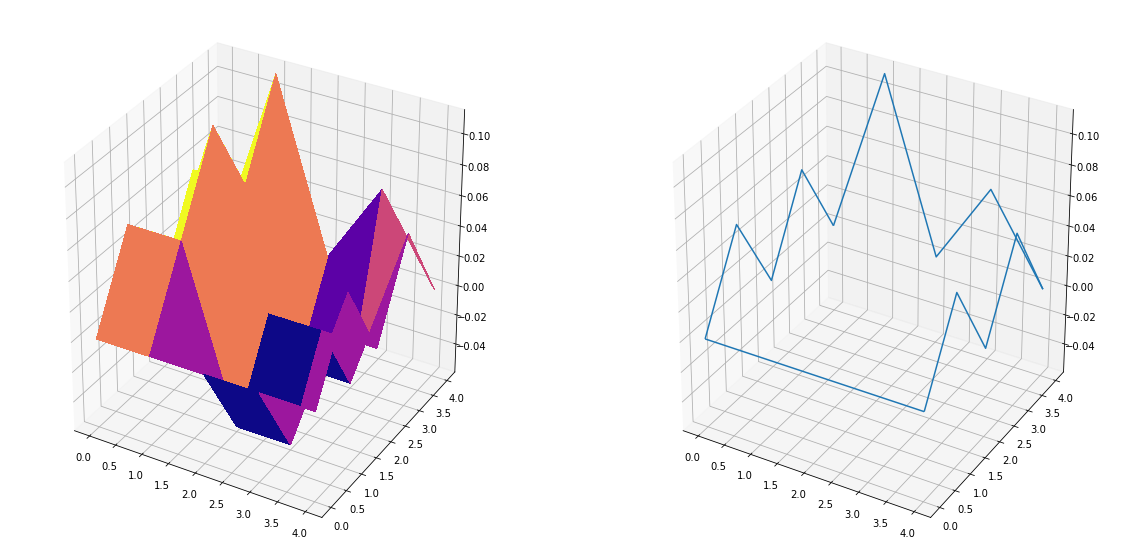

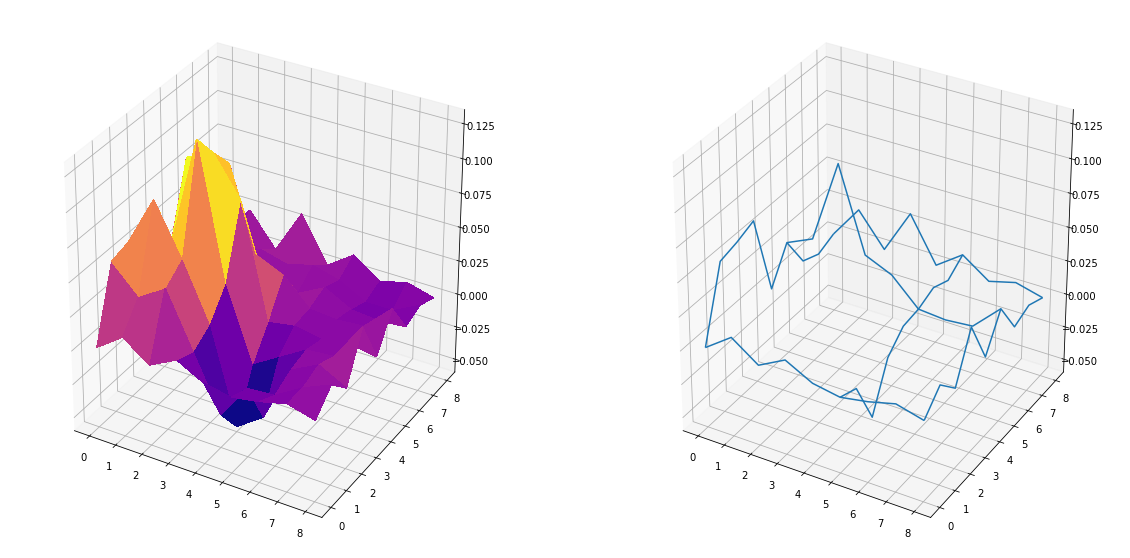

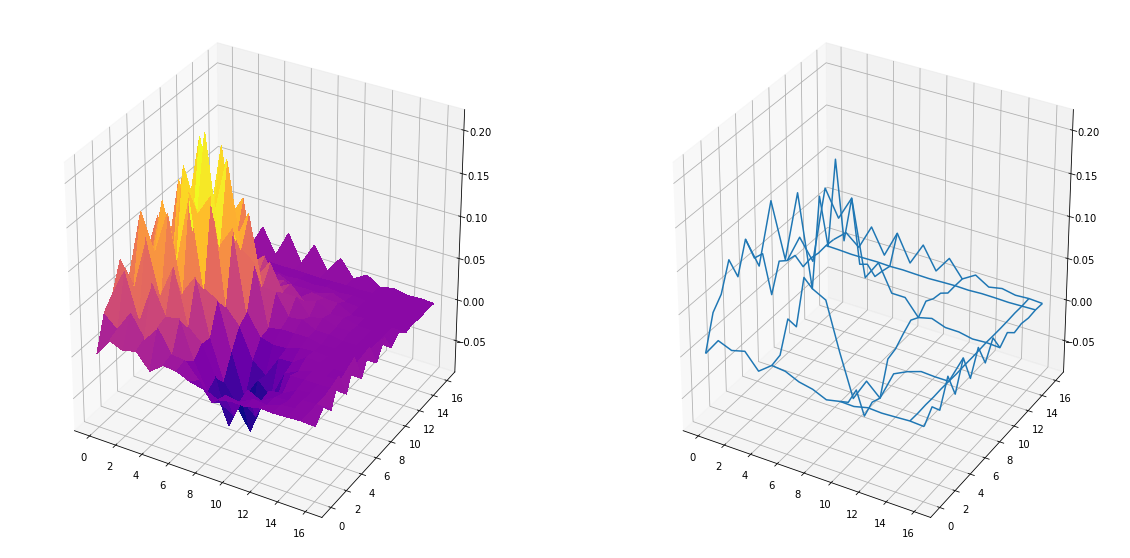

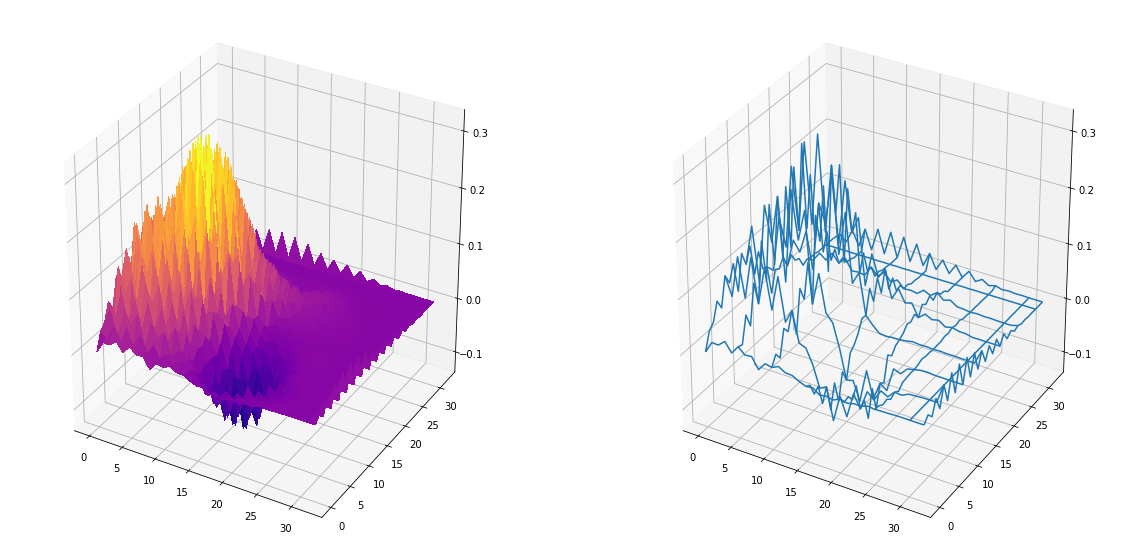

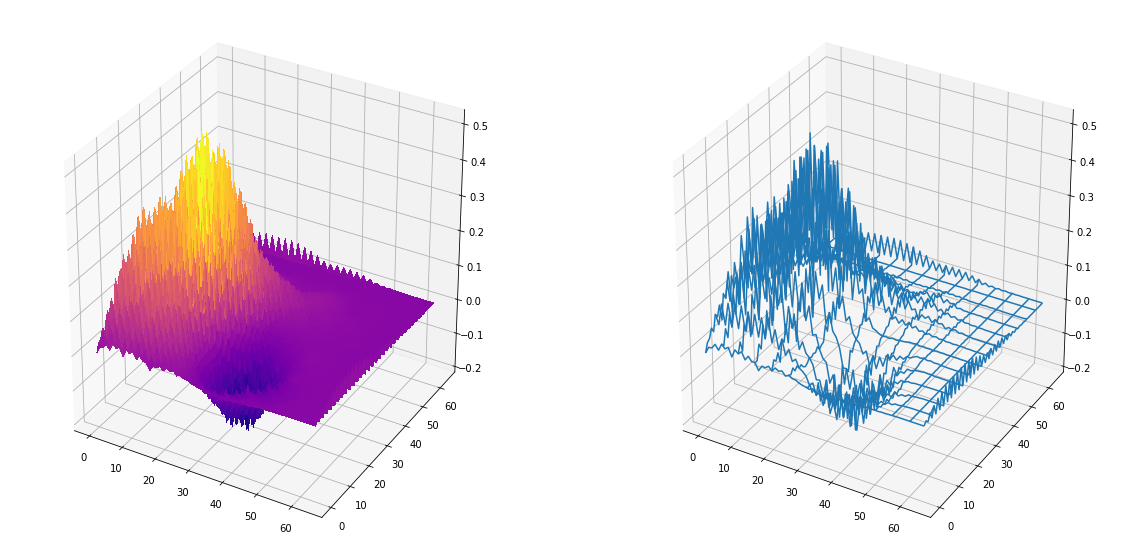

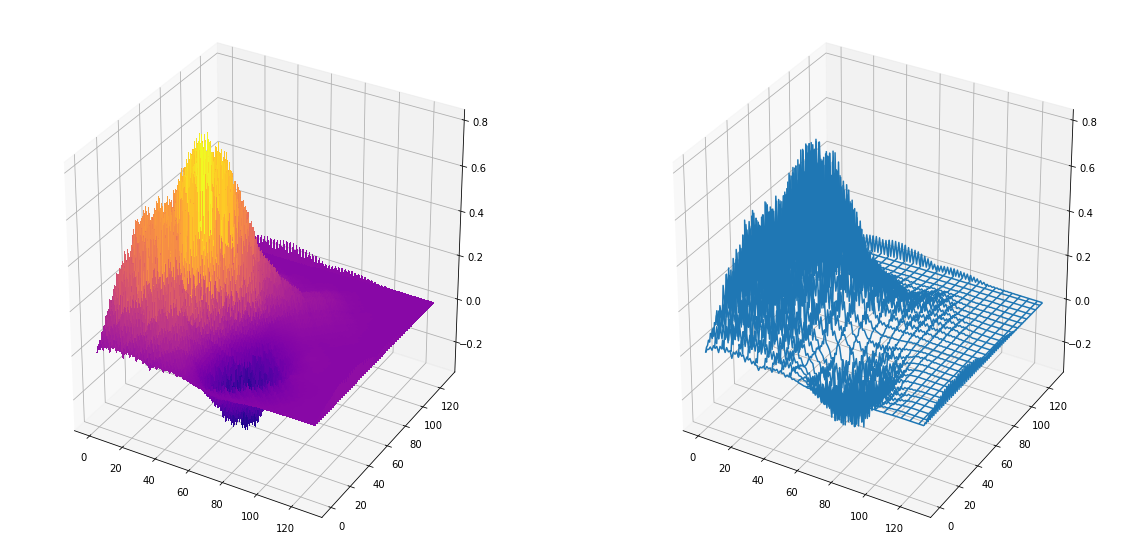

In [31]:
for step in range(maxstep):
    rango=rango*h*2**(-h)
    mborde = np.pad(matriz,pad_width=1,mode="constant",constant_values=0)
    #print(mborde)
    n = len(mborde)
    m2 = np.zeros((2*n-3,2*n-3))
    
    n2 = len(m2)
    #cuadrado
    for i in range (1, n-3):
        for j in range (1, n-3):
            m2[2*i-1,2*j-1]=mborde[i,j]
            #print(m2[i,j])
            #print(2*i-1,2*j-1)
    #print(m2)
    #centro de los cuadrados       
    mcuadrados = m2
    
    for i in range (2,n2-1, 2):
        for j in range (2,n2-1,2):
            #print(i,j)
            aleatorio = (random.choices(opciones,weights=prob,k=1))
            #print(aleatorio[0])
            aumento = 2*rango*aleatorio[0]-rango
            #print(aumento)
            mcuadrados[i,j] = (m2[i-1,j-1]+m2[i+1,j+1]+m2[i+1,j-1]+m2[i-1,j+1])*0.25 + aumento 
    #print(mcuadrados)
    m2 = mcuadrados
    #hacer que los bordes coinsidan con las columnas interiores, para sacar el triangulo
    m2[:,0]=mcuadrados[:,-3]
    m2[:,-1] = mcuadrados[:,2]
    m2[0,:] = mcuadrados[-3,:]
    m2[-1,:]=mcuadrados[:,2]
    #print(m2)
    
    #hacer el centro de los diamantes
    mdiamante = m2
    
    for i in range(1,n2-1):
        for j in range(2-((i+1)%2),n2-1,2):
            aleatorio = (random.choices(opciones,weights=prob,k=1))
            #print(aleatorio[0])
            aumento = 2*rango*aleatorio[0]-rango
            #print(aumento)
            mdiamante[i,j]=(m2[i-1,j]+m2[i+1,j]+m2[i,j-1]+m2[i,j+1])*0.5+aumento
    #print(mdiamante)
    
    #remover los bordes
    
    matriz = mdiamante[1:-1,1:-1]
    
    
    #crear las matrices x y y
    dimension = len(matriz)
    x= np.zeros((dimension,dimension))
    y= np.zeros((dimension,dimension))
    
    for i in range(dimension):
        for j in range(dimension):
            x[i,j]=j
            y[i,j]=i
    
    #graficar
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    
    surf = ax.plot_surface(x, y, matriz, rstride=1, cstride=1, cmap=cm.plasma,
                       linewidth=0, antialiased=False)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_wireframe(x, y, matriz, rstride=5, cstride=5)

    plt.show()

### 1.7 Conclusiones.
> Como se puede ver en las gráficas obtenidas, logramos la generación de terrenos aleatorios con el uso de fractales, el algoritmo de diamante cuadrado y los números aleatorios. 
> Utilizando matrices y herramientas de programacion podemos simular fenómenos naturales.

### 1.8 Referencias.
> - Fernández Cara, E. (2018). Fractales: bellos y sin embargo útiles. Obtenido de BLOG DEL INSTITUTO DE MATEMÁTICAS DE LA UNIVERSIDAD DE SEVILLA: https://institucional.us.es/blogimus/2018/10/fractales-bellos-y-sin-embargo-utiles/#:~:text=Un%20fractal%20es%20un%20objeto,por%20Beno%C3%AEt%20Mandelbrot%20en%201975.
> - Fractal landscape. (2022). Obtenido de WIKIPEDIA: https://en.wikipedia.org/wiki/Fractal_landscape#Generation_of_fractal_landscapes
> - Kaya, H. (s.f.). Fractal Landscape.
> - Martz, P. (s.f.). Generating Random Fractal Terrain. Obtenido de INTERNET ARCHIVE: https://web.archive.org/web/20060420054134/http://www.gameprogrammer.com/fractal.html#diamond
> - The Matplotlib development team. (s.f.). 3D plots as subplots. Obtenido de Matplotlib: https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html

